In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_genie_other_theta_mar18/' 
output_filedir = outputdir
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_genie_other_theta.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Genie other 2 univers sims, systematic, cos(Theta)

In [4]:
# Load input files
outputdir_png, outputdir_root, outputdir_pdf = NuCC.prepareOutput2(outputdir)

try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"Genie_other_theta.root","RECREATE");

#filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_overlay = 'NuCCana_overlay_V26_mar18.root'
#filename_overlay = 'NuCCana_overlay_v25_weighted_all.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	1012051
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	1.26811760704e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.0060278320856
Dirt:		0.0611423668132


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
if 1:
    #filename_overlay = 'NuCCana_overlay_V26_flux.rootout4_small.root'
    filename_overlay = 'NuCCana_overlay_V26_mar18_noflux.rootout4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	1013969
Data: Number of Entries:	28004
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root,outputdir_pdf)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [12]:
'''track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'
'''
track_start_border_x = '(TrackStart_x_sce <(-1.55+5) || TrackStart_x_sce > (254.8-5))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+5) || TrackEnd_x_sce > (254.8-5))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+5) || TrackStart_y_sce > (117.47-5))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+5) || TrackEnd_y_sce > (117.47-5))'
track_start_border_z = '(TrackStart_z_sce <(0.1+5) || TrackStart_z_sce > (1036.9-5))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+5) || TrackEnd_z_sce > (1039.9-5))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-4)<0.9 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-4)<0.9 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.95)<0.9 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time+(crt_trig_corr_med)/1000-3.57+3.195-3.95)<0.9 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-3.95)<0.9 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

weight_name = 'EventWeight*TunedCentralValue_Genie'


In [13]:
#weight_list = {}
'''weight_list_all = [ 'All_Genie', 'AxFFCCQEshape_Genie', 'DecayAngMEC_Genie', 'MaNCRES_Genie', 'Theta_Delta2Npi_Genie', 'TunedCentralValue_Genie',\
    'VecFFCCQEshape_Genie', 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
    'piplus_PrimaryHadronSWCentralSplineVariation', 'splines_general_Spline' ]'''

#weight_list_genie_other = [ 'AxFFCCQEshape_Genie', 'DecayAngMEC_Genie', 'MaNCRES_Genie', 'Theta_Delta2Npi_Genie', 'VecFFCCQEshape_Genie' ]

'''weight_list_flux = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
    'piplus_PrimaryHadronSWCentralSplineVariation' ]'''

#weight_list = [ 'AxFFCCQEshape_Genie', 'DecayAngMEC_Genie', 'MaNCRES_Genie', 'Theta_Delta2Npi_Genie', 'VecFFCCQEshape_Genie' ]
weight_list = [ 'AxFFCCQEshape_UBGenie', 'DecayAngMEC_UBGenie', 'NormCCCOH_UBGenie', 'NormNCCOH_UBGenie',\
               'RPA_CCQE_Reduced_UBGenie','RPA_CCQE_UBGenie','ThetaDelta2NRad_UBGenie','Theta_Delta2Npi_UBGenie',\
                'VecFFCCQEshape_UBGenie','XSecShape_CCMEC_UBGenie']

num_para = len(weight_list)
print 'Nuber of parameters: ',num_para


Nuber of parameters:  10


In [14]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
num_universes = 2
eff_uni = np.zeros((num_para,num_universes))
mom_bins = [ -1.00, -0.50, 0.00, 0.28, 0.47, 0.63, 0.765, 0.865, 0.935, 1.00 ]
binnum = len(mom_bins) - 1

In [15]:
variable = 'cos(TrackTheta)'
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_ext_mom = ROOT.TH1F('h_ext_mom','h_ext_mom',binnum,array('f',mom_bins))
h_data_mom = ROOT.TH1F('h_data_mom','h_data_mom',binnum,array('f',mom_bins))
h_dirt_mom = ROOT.TH1F('h_dirt_mom','h_dirt_mom',binnum,array('f',mom_bins))

globale.ext_out.Draw(variable+'>>h_ext_mom','('+cut+')')
globale.data_out.Draw(variable+'>>h_data_mom','('+cut+')')
globale.dirt_out.Draw(variable+'>>h_dirt_mom',weight_name+'*('+cut+')')

h_data_mom.Scale(globale.scale[globale.data])
h_ext_mom.Scale(globale.scale[globale.ext])
h_dirt_mom.Scale(globale.scale[globale.dirt])
#h_overlay.Scale(globale.scale[globale.overlay])

bkg_ext = h_ext_mom.Integral(0,binnum+1)
num_data = h_data_mom.Integral(0,binnum+1)
bkg_dirt = h_dirt_mom.Integral(0,binnum+1)

print 'Data: ', num_data,' Ext: ', bkg_ext,' Dirt: ',bkg_dirt

h_data_mom.Write("h_data_mom")
h_ext_mom.Write("h_ext_mom")
h_dirt_mom.Write("h_dirt_mom")

Data:  1348.0  Ext:  142.179031849  Dirt:  32.1298258305


475

In [16]:
weight_name = 'EventWeight*RootinoFix_UBGenie'
variable = 'cos(MCNu_leptonTheta)'
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_1d = []
h_1d_true = []

for para in range(num_para):
    h_1d.append([])
    h_1d_true.append([])
    for uni in range(num_universes):
        #print 'At universe: ',uni
        h_1d[para].append(ROOT.TH1F('h_1d['+str(para)+']['+str(uni)+']',"Track true momentum",binnum,array('f',mom_bins)))
        h_1d_true[para].append( ROOT.TH1F('h_1d_true['+str(para)+']['+str(uni)+']',"Track true momentum",binnum,array('f',mom_bins)) )

for para in range(num_para): 
    print 'Get efficiency of Parameter: ', weight_list[para]
    for uni in range(num_universes):
        globale.overlay_out.Draw(variable+'>>h_1d['+str(para)+']['+str(uni)+']',weight_name+'*'+weight_list[para]+'['+str(uni)+']*('+cut+'&& numu_signal)')
        globale.overlay_out.Draw(variable+'>>h_1d_true['+str(para)+']['+str(uni)+']',weight_name+'*'+weight_list[para]+'['+str(uni)+']*(numu_true)')
        num_signal = h_1d[para][uni].Integral(0,binnum+1)
        num_true = h_1d_true[para][uni].Integral(0,binnum+1)
        eff_uni[para][uni] = num_signal/(num_true+1e-80)
        h_1d[para][uni].Write('h_1d['+str(para)+']['+str(uni)+']')
        h_1d_true[para][uni].Write('h_1d_true['+str(para)+']['+str(uni)+']')
        print 'Parameter: ', weight_list[para], ' Universe: ', uni, ' number of signal: ', num_signal,' True: ', num_true,' Eff: ',eff_uni[para][uni]
# save the efficiencies
np.save(output_filedir+'xsec_flux_tot_efficiencies_theta',eff_uni)
print 'Total std of efficiency (all parameters, all universes)',eff_uni.std()

Get efficiency of Parameter:  AxFFCCQEshape_UBGenie
Parameter:  AxFFCCQEshape_UBGenie  Universe:  0  number of signal:  161599.167969  True:  307075.455078  Eff:  0.5262523112686963
Parameter:  AxFFCCQEshape_UBGenie  Universe:  1  number of signal:  161463.017578  True:  307093.699219  Eff:  0.5257776958266771
Get efficiency of Parameter:  DecayAngMEC_UBGenie
Parameter:  DecayAngMEC_UBGenie  Universe:  0  number of signal:  161800.819824  True:  308302.578125  Eff:  0.5248117638465458
Parameter:  DecayAngMEC_UBGenie  Universe:  1  number of signal:  161463.017578  True:  307093.699219  Eff:  0.5257776958266771
Get efficiency of Parameter:  NormCCCOH_UBGenie
Parameter:  NormCCCOH_UBGenie  Universe:  0  number of signal:  161808.052734  True:  307607.710938  Eff:  0.5260207952564989
Parameter:  NormCCCOH_UBGenie  Universe:  1  number of signal:  161463.017578  True:  307093.699219  Eff:  0.5257776958266771
Get efficiency of Parameter:  NormNCCOH_UBGenie
Parameter:  NormNCCOH_UBGenie  Uni

In [17]:
variable = 'cos(TrackTheta)'
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
weight_name = 'EventWeight*RootinoFix_UBGenie'

bkg_uni = np.zeros((num_para,num_universes))
h_1d_bkg = []
for para in range(num_para):
    h_1d_bkg.append([])
    for uni in range(num_universes):
        #print 'At universe: ',uni
        h_1d_bkg[para].append( ROOT.TH1F('h_1d_bkg['+str(para)+']['+str(uni)+']',"Track momentum",binnum,array('f',mom_bins)) )

for para in range(num_para):
    print 'Get background of Parameter: ', weight_list[para]
    for uni in range(num_universes):
        globale.overlay_out.Draw(variable+'>>h_1d_bkg['+str(para)+']['+str(uni)+']',weight_name+'*'+weight_list[para]+'['+str(uni)+']*('+cut+'&& !numu_signal)')
        h_1d_bkg[para][uni].Scale(globale.scale[globale.overlay])
        bkg_uni[para][uni] = h_1d_bkg[para][uni].Integral(0,binnum+1)
        h_1d_bkg[para][uni].Write('h_1d_bkg['+str(para)+']['+str(uni)+']')
        #print 'Parameter: ', weight_list_flux[para], ' Universe: ', uni, ' Overlay: ',bkg_uni[para][uni]


Get background of Parameter:  AxFFCCQEshape_UBGenie
Get background of Parameter:  DecayAngMEC_UBGenie
Get background of Parameter:  NormCCCOH_UBGenie
Get background of Parameter:  NormNCCOH_UBGenie
Get background of Parameter:  RPA_CCQE_Reduced_UBGenie
Get background of Parameter:  RPA_CCQE_UBGenie
Get background of Parameter:  ThetaDelta2NRad_UBGenie
Get background of Parameter:  Theta_Delta2Npi_UBGenie
Get background of Parameter:  VecFFCCQEshape_UBGenie
Get background of Parameter:  XSecShape_CCMEC_UBGenie


In [18]:
# calculate total flux integrated cross section:
weight_name = 'EventWeight*TunedCentralValue_Genie*RootinoFix_UBGenie'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
N_data = data_out.GetEntries(cut)
N_ext  = ext_out.GetEntries(cut)*scale_out[ext_out]
N_dirt = dirt_out.GetEntries(cut)*scale_out[dirt_out]
N_overlay = overlay_out.GetEntries(cut+'&& !numu_signal')*scale_out[overlay_out]
N_signal = overlay_out.GetEntries(cut+'&& numu_signal')*scale_out[overlay_out]
N_true = overlay_out.GetEntries('numu_true')*scale_out[overlay_out]

h_weight_func = ROOT.TH1F("h_weight_func",'h_weight_func',10000,0,1000)
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && 1','0')
dirt_pass_weight = h_weight_func.GetMean() 
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && numu_signal','0') # weights for signal definition
overlay_signal = h_weight_func.GetMean()
globale.overlay_out.Draw(weight_name+'>>h_weight_func',cut+' && !numu_signal','0') # weights for signal definition
overlay_pass_weight = h_weight_func.GetMean()

overlay_out.Draw(weight_name+'>>h_weight_func',numu_true,'0') # weights for signal definition
overlay_true_weight = h_weight_func.GetMean()

N_dirt = N_dirt*dirt_pass_weight
N_overlay = N_overlay*overlay_pass_weight
N_signal = N_signal*overlay_signal
N_true = N_true*overlay_true_weight
eff = N_signal/N_true

sigma_tot = (N_data- (N_ext+N_dirt+N_overlay))/(eff*beam_flux*N_tot)
print 'Number of data:', N_data
print 'Number of ext:', N_ext
print 'Number of dirt:', N_dirt
print 'Number of overlay:', N_overlay
print 'Number of overlay signal:', N_signal
print 'Efficiency: ',eff
print 'Total integrated cross section:', sigma_tot
xsec_CV = sigma_tot
sigma_tot_MC = (N_signal)/(eff*beam_flux*N_tot)
print 'Total integrated cross section for MC:', sigma_tot_MC

Number of data: 1348
Number of ext: 142.179032863
Number of dirt: 32.1859727109
Number of overlay: 199.17724577
Number of overlay signal: 973.277128269
Efficiency:  0.525781702998
Total integrated cross section: 8.00767014933e-39
Total integrated cross section for MC: 7.99796832424e-39


In [19]:
# calculate the total cross section and the difference to the CV
# from momentum CV xsec:
#xsec_CV = 7.6770041506e-39
xsec_uni = np.zeros((num_para,num_universes))
       
xsec_std = np.zeros((num_para))
xsec_mean = np.zeros((num_para))
xsec_diff = np.zeros((num_para))
#xsec_CV = 8.00835474027e-39 
xsec_diff_tot = 0.0
print num_data,bkg_ext,bkg_dirt,N_tot,beam_flux

for para in range(num_para):
    for uni in range(num_universes):
        signal = num_data - bkg_ext - bkg_dirt - bkg_uni[para][uni]
        xsec_uni[para][uni] = (num_data - bkg_ext - bkg_dirt - bkg_uni[para][uni])/(eff_uni[para][uni] * N_tot * beam_flux)
        #print 'Parameter: ', weight_list[para], ' Universe: ', uni, ' Total fulux integrated xsec: ',xsec_uni[para][uni]
    xsec_diff[para] = (xsec_uni[para][0] - xsec_uni[para][1])
    print 'Parameter: %25s'% weight_list[para], ' mean: {0:0.3e}%'.format(xsec_uni[para][1]), ' deviation: {0:0.3e}%'.format(xsec_uni[para][0]-xsec_uni[para][1]),' in percent: {0:0.3f}%'.format(xsec_uni[para][0]*100.0/xsec_uni[para][1]-100,'%')
    xsec_diff_tot = xsec_diff_tot + xsec_diff[para]*xsec_diff[para]
    
xsec_diff_tot = math.sqrt(xsec_diff_tot)
print 'Total error in percent: {0:0.5f}%'.format(xsec_diff_tot*100.0/xsec_uni[0][1],'%')

1348.0 142.179031849 32.1298258305 4.10331109202e+31 5640491186.57
Parameter:     AxFFCCQEshape_UBGenie  mean: 8.008e-39%  deviation: -4.881e-42%  in percent: -0.061%
Parameter:       DecayAngMEC_UBGenie  mean: 8.008e-39%  deviation: 1.095e-41%  in percent: 0.137%
Parameter:         NormCCCOH_UBGenie  mean: 8.008e-39%  deviation: -7.860e-42%  in percent: -0.098%
Parameter:         NormNCCOH_UBGenie  mean: 8.008e-39%  deviation: -9.647e-43%  in percent: -0.012%
Parameter:  RPA_CCQE_Reduced_UBGenie  mean: 8.033e-39%  deviation: -4.904e-41%  in percent: -0.611%
Parameter:          RPA_CCQE_UBGenie  mean: 8.050e-39%  deviation: -8.175e-41%  in percent: -1.016%
Parameter:   ThetaDelta2NRad_UBGenie  mean: 8.008e-39%  deviation: 0.000e+00%  in percent: 0.000%
Parameter:   Theta_Delta2Npi_UBGenie  mean: 8.008e-39%  deviation: -6.563e-41%  in percent: -0.819%
Parameter:    VecFFCCQEshape_UBGenie  mean: 8.008e-39%  deviation: -2.463e-41%  in percent: -0.308%
Parameter:   XSecShape_CCMEC_UBGenie 

In [20]:
#get mitigation matrix for each universe for momentum
cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

migration_matrix = np.zeros((num_para,num_universes,9,9))

h_migration = []
h_mitigation_matrix = []
for para in range(num_para):
    h_migration.append([])
    h_mitigation_matrix.append([])
    for uni in range(num_universes):
        h_migration[para].append(ROOT.TH2F('h_migration['+str(para)+']['+str(uni)+']',"Track momentum",binnum,array('f',mom_bins),binnum,array('f',mom_bins)))
        h_mitigation_matrix[para].append(ROOT.TH2F('h_mitigation_matrix['+str(para)+']['+str(uni)+']','Migration matrix',7,0,7,6,0,6))

for para in range(num_para):
    for uni in range(num_universes):
        overlay_out.Draw('cos(MCNu_leptonTheta):cos(TrackTheta)'+'>>h_migration['+str(para)+']['+str(uni)+']',weight_name+'*'+weight_list[para]+'['+str(uni)+']*('+cut+' && numu_true)','')
        h_migration[para][uni].Write('h_migration['+str(para)+']['+str(uni)+'])')
        
mitigation_matrix = np.zeros((num_para,num_universes,9,9))
for para in range(num_para):
    for uni in range(num_universes):
        reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
        for j in range(1,binnum+1):
            for i in range(1,binnum+1):
                reco_entries[j-1]+=h_migration[para][uni].GetBinContent(i,j)
        for j in range(1,binnum+1):
            for i in range(1,binnum+1):
                mitigation_matrix[para,uni,i-1,j-1]= h_migration[para][uni].GetBinContent(i,j)/reco_entries[j-1]
                h_mitigation_matrix[para][uni].SetBinContent(i,j,mitigation_matrix[para,uni,i-1,j-1])
        h_mitigation_matrix[para][uni].Write('h_mitigation_matrix['+str(para)+']['+str(uni)+']')


In [21]:
# calculate e tilde for all universes
N_sel = np.zeros((num_para,num_universes,9))
N_gen = np.zeros((num_para,num_universes,9))
eff_tilde = np.zeros((num_para,num_universes,9))
#h_eff_true = {}
for para in range(num_para):
    for uni in range(num_universes):
        for i in range(1,binnum+1):
            N_sel[para][uni][i-1] = h_1d[para][uni].GetBinContent(i)
            N_gen[para][uni][i-1] = h_1d_true[para][uni].GetBinContent(i)
        #print N_sel[uni]
        #print N_gen[uni]
        #print mitigation_matrix[uni]
        #print mitigation_matrix[uni].dot(N_sel[uni])/(mitigation_matrix[uni].dot(N_gen[uni]))
        eff_tilde[para][uni] = mitigation_matrix[para][uni].dot(N_sel[para][uni])/(mitigation_matrix[para][uni].dot(N_gen[para][uni]))
np.save(output_filedir+'eff_tilde_genie_other_theta',eff_tilde)

h_eff_true = []
h_eff_tilde = []
for para in range(num_para):
    h_eff_true.append([])
    h_eff_tilde.append([])
    for uni in range(num_universes):
        h_eff_tilde[para].append(ROOT.TH1F("h_eff_tilde["+str(uni)+']','Efficiency tilde',binnum,array('f',mom_bins)))
        h_eff_true[para].append(h_1d[para][uni].Clone())
        #h_eff_true[para][uni].Sumw2()
        h_eff_true[para][uni].Divide(h_1d_true[para][uni])
        for i in range(1,binnum+1):
            h_eff_tilde[para][uni].SetBinContent(i,eff_tilde[para][uni][i-1])
            h_eff_tilde[para][uni].SetBinError(i,h_eff_true[para][uni].GetBinError(i))
        h_eff_tilde[para][uni].SetYTitle("reconstructed efficiency")
        h_eff_tilde[para][uni].SetXTitle("cos(\Theta)_{\mu}")
        h_eff_tilde[para][uni].Write('h_eff_tilde['+str(para)+']['+str(uni)+']')
        h_eff_true[para][uni].Write('h_eff_true['+str(para)+']['+str(uni)+']')

Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde[0] (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde[1] (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde[0] (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde[1] (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde[0] (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde[1] (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde[0] (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde[1] (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde[0] (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde[1] (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_eff_tilde[0] (Potential me

In [22]:
h_xsec = []
for para in range(num_para):
    h_xsec.append([])
    for uni in range(num_universes): 
        h_xsec[para].append(h_data_mom.Clone())
        #h_xsec[para][uni].Sumw2()
        h_xsec[para][uni].Add(h_ext_mom,-1)
        h_xsec[para][uni].Add(h_dirt_mom,-1)
        h_xsec[para][uni].Add(h_1d_bkg[para][uni],-1)
        print h_xsec[para][uni].GetSumOfWeights()


974.811267853
974.526054382
974.066066742
974.526054382
974.019721985
974.526054382
974.411529541
974.526054382
974.322032928
974.730133057
974.185955048
974.866146088
974.526054382
974.526054382
968.075839996
974.526054382
975.534362793
974.526054382
969.291320801
976.002700806


In [23]:

for para in range(num_para):
    for uni in range(num_universes): 
        h_xsec[para][uni].Divide(h_eff_tilde[para][uni])
        h_xsec[para][uni].Scale(1.0/(N_tot * beam_flux))
        for i in range(1,binnum+1):
            h_xsec[para][uni].SetBinContent(i,h_xsec[para][uni].GetBinContent(i)/h_xsec[para][uni].GetBinWidth(i))
        h_xsec[para][uni].Write('h_xsec['+str(uni)+']')

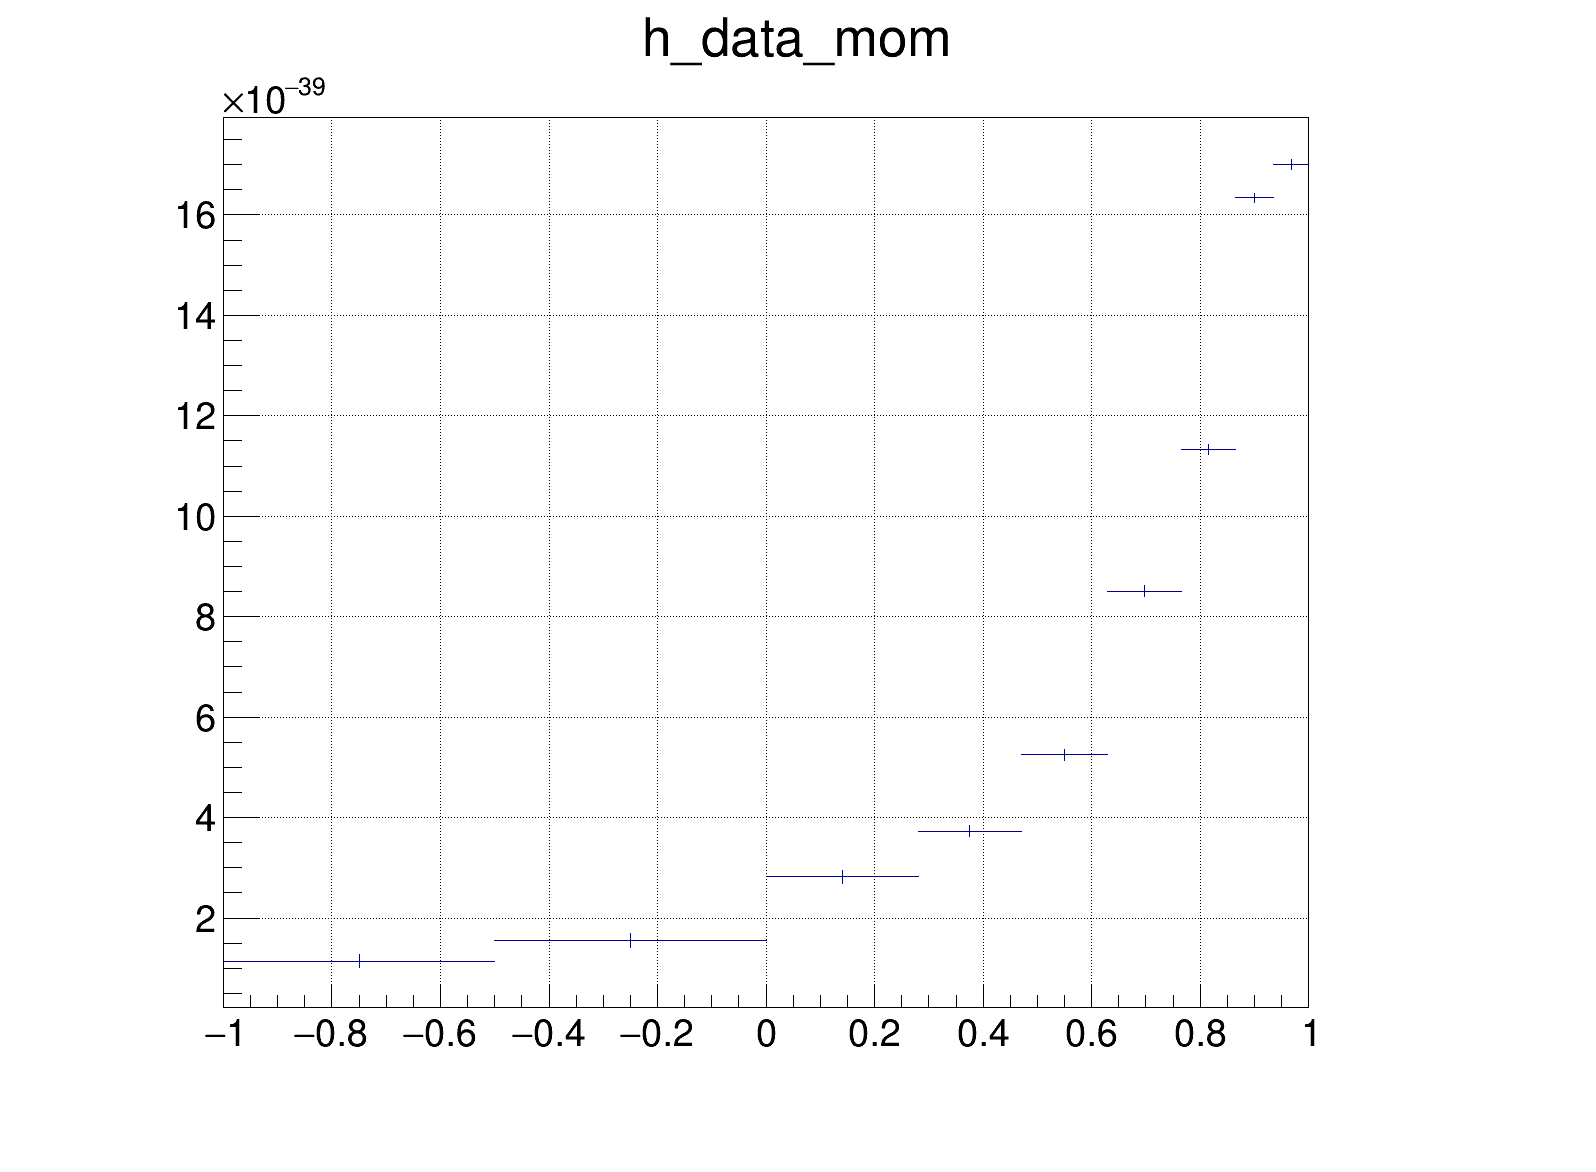

In [24]:
h_xsec[0][0].Draw()
c1.Draw()

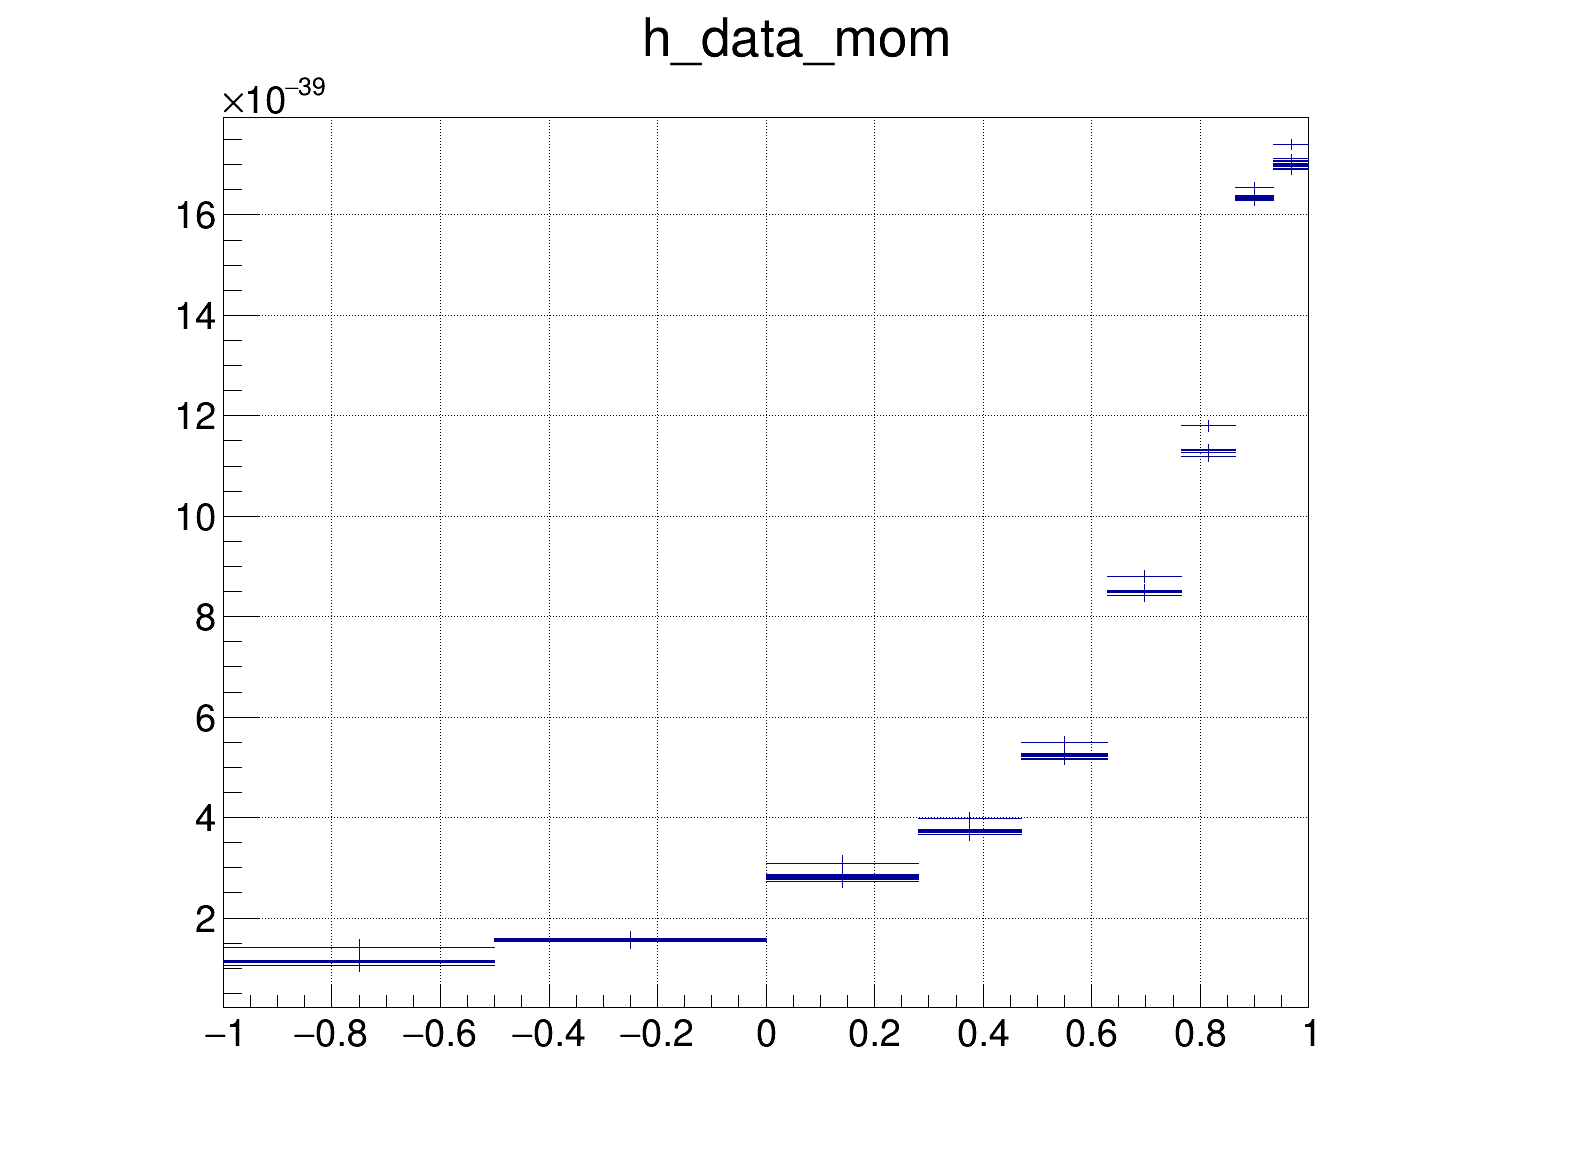

In [25]:
for para in range(num_para):
    for uni in range(num_universes): 
        h_xsec[para][uni].Draw('same')
c1.Draw()

In [26]:
# close the root file with all the histos
RootFile.Close()